In [60]:
# 라이브러리 로드
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [61]:
# 데이터 로드

수익성 = pd.read_csv('./data/코스닥/코스닥 수익성.csv',encoding='cp949')
안정성 = pd.read_csv('./data/코스닥/코스닥 안정성.csv',encoding='cp949')
활동성 = pd.read_csv('./data/코스닥/코스닥 활동성.csv',encoding='cp949')
성장성 = pd.read_csv('./data/코스닥/코스닥 성장성 계산용.csv',encoding='cp949')
현금흐름 = pd.read_csv('./data/코스닥/코스닥 현금흐름 + 누적수익성비율.csv',encoding='cp949')
연구개발 = pd.read_csv('./data/코스닥/코스닥 rs.csv',encoding='cp949')
EBIT = pd.read_csv('./data/코스닥/에비~ 코스닥.csv',encoding='cp949')
per_pbr_총부채 = pd.read_csv('./data/코스닥/per pbr 총부채 코스닥.csv',encoding='cp949')
직원수_업력 = pd.read_csv('./data/코스닥/코스닥 직원수 급여 업력 외국인 대주주.csv',encoding='cp949')
시가총액 = pd.read_csv('./data/코스닥/코스닥시가총액.csv',index_col=0)  #### 시총도 붙여야됨
단기차입금 = pd.read_csv('./data/코스닥/코스닥 단기차입금 유동성 장기부채.csv',encoding='cp949')
거시변수 = pd.read_excel('./data/거시경제 변수/거시변수.xlsx', engine="openpyxl")
상장일 = pd.read_csv('./data/코스닥/코스닥 상장일.csv',encoding='cp949')
대분류 = pd.read_csv('./data/코스닥/코스닥 대분류.csv',encoding='cp949')
유형자산 = pd.read_csv("./data/코스닥/코스닥 유형자산증가율.csv", encoding= "cp949")

In [62]:
#  사용 안하는 코드 컬럼 삭제 
대분류.drop(['통계청 한국표준산업분류 코드 10차(대분류)'],axis=1,inplace=True)

In [63]:
#  데이터 결합

df = 안정성.merge(수익성,on=['회사명','거래소코드','회계년도'],how='left')
df = df.merge(활동성,on=['회사명','거래소코드','회계년도'],how='left')
df = df.merge(성장성,on=['회사명','거래소코드','회계년도'],how='left')
df = df.merge(현금흐름,on=['회사명','거래소코드','회계년도'],how='left')
df = df.merge(연구개발,on=['회사명','거래소코드','회계년도'],how='left')
df = df.merge(EBIT,on=['회사명','거래소코드','회계년도'],how='left')
df = df.merge(per_pbr_총부채,on=['회사명','거래소코드','회계년도'],how='left')
df = df.merge(직원수_업력,on=['회사명','거래소코드','회계년도'],how='left')
df = df.merge(단기차입금,on=['회사명','거래소코드','회계년도'],how='left')
df = df.merge(상장일,on=['회사명','거래소코드','회계년도'],how='left')
df = df.merge(대분류,on=['회사명','거래소코드','회계년도'],how='left')
df = df.merge(유형자산,on=['회사명','거래소코드','회계년도'],how='left')

In [64]:
len(df.columns)

97

In [65]:
## 거래소코드 패딩
def padding(x):
    x = str(x)
    return x.rjust(6, "0")
## 외국계기업 제거
def func_isnt_fcompany(x):
    if x[:1] == '9':
        return False
    else:
        return True

# 회계년도컬럼, 년도만 뽑아서 int화
def change_year(x):
    return int(x[:4])

def func_not(x):
    return not x

def change_year_2(x):
    return (x[:4])

In [66]:
## 거래소 코드 패딩
df['거래소코드'] = df['거래소코드'].map(padding)
# 회계년도 변환
df['회계년도'] = df['회계년도'].map(change_year)

In [67]:

# pd.set_option("display.max.rows", None)
pd.reset_option("display.max.rows", None)
df.isna().sum()

회사명                            0
거래소코드                          0
회계년도                           0
자산(*)(요약)(IFRS)             1844
자본(*)(요약)(IFRS)             1844
                            ... 
유동성장기부채(요약)(IFRS연결)(백만원)    5530
상장일                            0
통계청 한국표준산업분류 10차(대분류)          0
유형자산의 증가(*)(IFRS)(천원)       1844
유형자산의 증가(*)(IFRS연결)(천원)     5530
Length: 97, dtype: int64

In [68]:
## 중복되는 데이터 제거
df.drop_duplicates(['거래소코드',"회계년도"], keep='last', inplace=True)
df.reset_index(drop=True, inplace=True)

## 없음


In [69]:
print('전체 행:', df.shape[0],'개')
print('전체 기업 수',len(df['회사명'].unique()))

전체 행: 15617 개
전체 기업 수 1744


In [70]:
## 외국계 기업 제거
print("제거할 데이터 수 : ", len(df[df["거래소코드"].map(func_isnt_fcompany).map(func_not)]))
print('제거할 외국계 기업 수',len(df[~df["거래소코드"].map(func_isnt_fcompany)].회사명.unique()))

df = df[df["거래소코드"].map(func_isnt_fcompany)]
print('남은 데이터 수',df.shape[0]) # 외국계기업 데이터 24개 제거
print('남은 기업 수',len(df['회사명'].unique()))

제거할 데이터 수 :  152
제거할 외국계 기업 수 23
남은 데이터 수 15465
남은 기업 수 1721


In [71]:
## 회사수와 거래소코드수 차이가나는것 확인
print("회사수 : ", len(df["회사명"].unique()))
print("거래소코드수 : ", len(df["거래소코드"].unique()))

회사수 :  1721
거래소코드수 :  1743


In [72]:
## 거래소 코드 중복기업 전처리
list_overlap_code = list()
for i in list(df["회사명"].unique()):
    if len(df[df["회사명"]==i]["거래소코드"].unique()) > 1:
        list_overlap_code.append(i)
print("거래소코드가 2개인 기업 수", len(list_overlap_code), "개")

거래소코드가 2개인 기업 수 22 개


In [73]:
df[df["회사명"].isin(list_overlap_code)]

,회사명,거래소코드,회계년도,자산(*)(요약)(IFRS),자본(*)(요약)(IFRS),차입금의존도(IFRS)(백만원),유보율(IFRS),현금비율(IFRS),부채비율(IFRS),당좌비율(IFRS),...,외국인_주식분포비율,보통주식비율,단기차입금(요약)(IFRS)(백만원),유동성장기부채(요약)(IFRS)(백만원),단기차입금(요약)(IFRS연결)(백만원),유동성장기부채(요약)(IFRS연결)(백만원),상장일,통계청 한국표준산업분류 10차(대분류),유형자산의 증가(*)(IFRS)(천원),유형자산의 증가(*)(IFRS연결)(천원)
2424,(주)본느,242420,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016/05/16,제조업,NaN,NaN
2425,(주)본느,242420,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016/05/16,제조업,NaN,NaN
2426,(주)본느,226340,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.03,9.09,NaN,NaN,NaN,NaN,2015/11/05,제조업,NaN,NaN
2427,(주)본느,242420,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,74.70,NaN,NaN,NaN,NaN,2016/05/16,제조업,NaN,NaN
2428,(주)본느,226340,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.40,9.49,NaN,NaN,NaN,NaN,2015/11/05,제조업,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15058,패션플랫폼(주),225590,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.24,4.78,NaN,NaN,NaN,NaN,2015/10/05,제조업,NaN,NaN
15059,패션플랫폼(주),225590,2018,43263.0,31640.0,6.84,1240.05,87.69,36.73,191.57,...,0.15,57.92,0.0,0.0,NaN,NaN,2015/10/05,제조업,642500.0,NaN
15060,패션플랫폼(주),225590,2019,54773.0,40656.0,7.02,1505.74,32.98,34.72,196.55,...,0.76,56.48,0.0,1588.0,NaN,NaN,2015/10/05,제조업,923838.0,NaN
15061,패션플랫폼(주),225590,2020,54913.0,41741.0,6.24,1546.46,36.91,31.56,175.55,...,2.20,57.49,50.0,1738.0,NaN,NaN,2015/10/05,제조업,1591910.0,NaN


In [74]:
list_overlap_code

['(주)본느',
 '(주)세화피앤씨',
 '(주)아이엘사이언스',
 '(주)알로이스',
 '(주)에스에이티',
 '(주)엔케이맥스',
 '(주)원바이오젠',
 '(주)인산가',
 '(주)자비스',
 '(주)정다운',
 '(주)카이노스메드',
 '(주)티에스트릴리온',
 '(주)포인트엔지니어링',
 '(주)한국비엔씨',
 '(주)휴럼',
 '나무기술(주)',
 '소프트캠프(주)',
 '씨아이에스(주)',
 '에스케이오션플랜트(주)',
 '엠에프엠코리아(주)',
 '줌인터넷(주)',
 '패션플랫폼(주)']

In [75]:
# 중복 거래소코드 제거
def func_overlap_code(x):
    if x == (df[df["회사명"]==company_name]["거래소코드"].iloc[-1]) :
        return True
    else:
        return False

list_companyname = list(df["회사명"].unique())


dfs = list()


for i in list_companyname:
    company_name = i
    #각 기업별로 데이터프레임 생성
    df_concat = df[df["회사명"]==i]
    df_concat = df_concat[df_concat["거래소코드"].map(func_overlap_code)] # 거래소코드 바뀌기 전의 거래소코드의 데이터는 삭제
    dfs.append(df_concat)
df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)

In [76]:
# 회사명이 2개인 거래소코드 존재 확인 
list_overlap_code = list()
for i in list(df["거래소코드"].unique()):
    if len(df[df["거래소코드"]==i]["회사명"].unique()) > 1:
        list_overlap_code.append(i)
list_overlap_code

[]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15329 entries, 0 to 15328
Data columns (total 97 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   회사명                                          15329 non-null  object 
 1   거래소코드                                        15329 non-null  object 
 2   회계년도                                         15329 non-null  int64  
 3   자산(*)(요약)(IFRS)                              13662 non-null  float64
 4   자본(*)(요약)(IFRS)                              13662 non-null  float64
 5   차입금의존도(IFRS)(백만원)                            13464 non-null  float64
 6   유보율(IFRS)                                    13464 non-null  float64
 7   현금비율(IFRS)                                   13464 non-null  float64
 8   부채비율(IFRS)                                   13464 non-null  float64
 9   당좌비율(IFRS)                                   13464 non-null  float64
 10

In [78]:
#  연결 재무제표를 개별제무제표로 대체
 


connected_cols = [col for col in df.columns if "연결" in col]

for connected_col in connected_cols:
    original_col = connected_col.replace("연결", "")
    if original_col in df.columns:
        df.loc[df[connected_col].isnull(), connected_col] = df[original_col]

In [79]:
pd.set_option("display.max.rows", None)
df.isna().sum()

회사명                                               0
거래소코드                                             0
회계년도                                              0
자산(*)(요약)(IFRS)                                1667
자본(*)(요약)(IFRS)                                1667
차입금의존도(IFRS)(백만원)                              1865
유보율(IFRS)                                      1865
현금비율(IFRS)                                     1865
부채비율(IFRS)                                     1865
당좌비율(IFRS)                                     1865
순운전자본비율(IFRS)                                  1865
*이자비용(요약)(IFRS)(백만원)                           1667
* (정상)영업손익(보고서기재)(요약)(IFRS)(백만원)               1667
감가상각비(IFRS)(천원)                                1667
자산(*)(요약)(IFRS연결)                              1666
자본(*)(요약)(IFRS연결)                              1666
차입금의존도(IFRS연결)                                 5482
유보율(IFRS연결)(백만원)                               5482
현금비율(IFRS연결)(백만원)                              5482
부채비율(IFRS연결)

In [80]:
# 위 코드에서 채워 지지 않은 컬럼 결측치 다시 채워주기
df["차입금의존도(IFRS연결)"].fillna(df["차입금의존도(IFRS)(백만원)"], inplace = True)
df["유보율(IFRS연결)(백만원)"].fillna(df["유보율(IFRS)"], inplace = True)
df["현금비율(IFRS연결)(백만원)"].fillna(df["현금비율(IFRS)"], inplace = True)

df.isna().sum()


회사명                                               0
거래소코드                                             0
회계년도                                              0
자산(*)(요약)(IFRS)                                1667
자본(*)(요약)(IFRS)                                1667
차입금의존도(IFRS)(백만원)                              1865
유보율(IFRS)                                      1865
현금비율(IFRS)                                     1865
부채비율(IFRS)                                     1865
당좌비율(IFRS)                                     1865
순운전자본비율(IFRS)                                  1865
*이자비용(요약)(IFRS)(백만원)                           1667
* (정상)영업손익(보고서기재)(요약)(IFRS)(백만원)               1667
감가상각비(IFRS)(천원)                                1667
자산(*)(요약)(IFRS연결)                              1666
자본(*)(요약)(IFRS연결)                              1666
차입금의존도(IFRS연결)                                 1863
유보율(IFRS연결)(백만원)                               1863
현금비율(IFRS연결)(백만원)                              1863
부채비율(IFRS연결)

In [81]:
#  삭제 할 개별재무제표 컬럼 정리  
pd.reset_option("display.max.rows", None)

drop_col = ['유보율(IFRS)' ,'[제조]* (정상)영업손익(보고서기재)(요약)(IFRS)(백만원)','[제조]      이익잉여금(결손금)(요약)(IFRS)(백만원)',
'[제조]영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS)(백만원)','자산(*)(요약)(IFRS)(백만원)', 
'부채(*)(요약)(IFRS)(백만원)','[제조]자본(*)(요약)(IFRS)(백만원)','당기순이익(손실)(요약)(IFRS)(백만원)', 
'법인세비용차감전순이익(손실)(요약)(IFRS)(백만원)','금융원가(요약)(IFRS)(백만원)','금융수익(요약)(IFRS)(백만원)',
'매출액(수익)(요약)(IFRS)(백만원)','연구개발비(IFRS)(천원)',
'[제조]      유형자산(요약)(IFRS)(백만원)','자본금회전률(IFRS)',
'총자본회전률(IFRS)','재고자산회전률(IFRS)','유형자산회전율(IFRS)','자기자본회전률(IFRS)','타인자본회전률(IFRS)',
'경영자본순이익률(IFRS)','금융비용부담률(IFRS)','총자본순이익률(IFRS)','매출액총이익률(IFRS)',
'자기자본순이익률(IFRS)','총자본정상영업이익률(IFRS)','자산(*)(요약)(IFRS)','자본(*)(요약)(IFRS)',
 '현금비율(IFRS)','* (정상)영업손익(보고서기재)(요약)(IFRS)(백만원)',
 '차입금의존도(IFRS)(백만원)','감가상각비(IFRS)(천원)','부채비율(IFRS)',
'당좌비율(IFRS)','*이자비용(요약)(IFRS)(백만원)','순운전자본비율(IFRS)',
'[제조]자산(*)(요약)(IFRS)(백만원)_x','[제조]자산(*)(요약)(IFRS연결)(백만원)_x',
'[제조]자산(*)(요약)(IFRS)(백만원)_y','[제조]자산(*)(요약)(IFRS연결)(백만원)_y',
'[제조]매출액(수익)(요약)(IFRS)(백만원)_y', '[제조]매출액(수익)(요약)(IFRS연결)(백만원)_y',
'[제조]매출액(수익)(요약)(IFRS)(백만원)_x', '[제조]매출액(수익)(요약)(IFRS연결)(백만원)_x',
'유동성장기부채(요약)(IFRS)(백만원)','단기차입금(요약)(IFRS)(백만원)','자산(*)(요약)(IFRS연결)(백만원)','[제조]자본(*)(요약)(IFRS연결)(백만원)',"유형자산의 증가(*)(IFRS)(천원)"
]

# 개별재무제표 컬럼 삭제
df.drop(drop_col,axis=1,inplace=True)

In [82]:
len(df.columns)

48

In [83]:
## 성장성 지표인 증가율 컬럼 만들기
성장성_col = ['[제조]      유형자산(요약)(IFRS연결)(백만원)','매출액(수익)(요약)(IFRS연결)(백만원)',
           '자본(*)(요약)(IFRS연결)','자산(*)(요약)(IFRS연결)',
           '[제조]* (정상)영업손익(보고서기재)(요약)(IFRS연결)(백만원)']

## 증가율 컬럼 전기에 음수일때 당기에 음수지만 증가할때 증가율 계산
## ex (2011년 -20, 2012년 -10) -> -10-(-20) / np.abs(-20)= 
증가율_df = (df.groupby(['회사명', '거래소코드'])[성장성_col].shift(0) - df.groupby(['회사명', '거래소코드'])[성장성_col].shift(1)) / np.abs(df.groupby(['회사명', '거래소코드'])[성장성_col].shift(1))*100
증가율_df.rename(columns={'[제조]      유형자산(요약)(IFRS연결)(백만원)':'유형자산증가율', '매출액(수익)(요약)(IFRS연결)(백만원)':'매출액증가율',
       '자본(*)(요약)(IFRS연결)':'자기자본증가율', '자산(*)(요약)(IFRS연결)':'총자본증가율',
       '[제조]* (정상)영업손익(보고서기재)(요약)(IFRS연결)(백만원)':'정상영업이익증가율'},inplace=True)

df.drop(['[제조]      유형자산(요약)(IFRS연결)(백만원)','[제조]* (정상)영업손익(보고서기재)(요약)(IFRS연결)(백만원)'],axis=1,inplace=True)
df = pd.concat([df,증가율_df],axis=1)

In [84]:
## 시가총액 merge
시가총액['회계년도'] = 시가총액['회계년도'].astype(str).str[:4].astype(int)
df = df.merge(시가총액,on=['거래소코드','회계년도'],how='left')
df['시가총액(백만원)'] = df['시가총액'] / 1000000
df.drop(['시가총액'],axis=1,inplace=True)

## 거시변수 merge
거시변수.rename(columns={'회계연도':'회계년도'},inplace=True)
df = df.merge(거시변수,on=['회계년도'],how='left')

In [85]:
### 파생변수 만들기 


## 기업별 업력 설립일 이후 지속된 기간
df['업력'] = df['회계년도'] -  pd.to_datetime(df['설립일'],format='%Y/%m/%d').dt.strftime('%Y').astype(int)
df.drop('설립일',axis=1,inplace=True)

## 누적수익성비율  - 자산0이면 inf - 공시안함 
df['누적수익성비율'] = (df['[제조]      이익잉여금(결손금)(요약)(IFRS연결)(백만원)']/df['자산(*)(요약)(IFRS연결)']) * 100

## 이자부담율
# df['이자부담률'] = (df['EBITDA(IFRS)(백만원)'] / df['*이자비용(요약)(IFRS연결)(백만원)']) * 100 

## 부채상환계수 EBITDA / (이자비용 + 단기차입금 + 유동성장기부채)
# df['부채상환계수'] =( df['EBITDA(IFRS)(백만원)'] / (df['*이자비용(요약)(IFRS연결)(백만원)']+df['단기차입금(요약)(IFRS연결)(백만원)'] + df['유동성장기부채(요약)(IFRS연결)(백만원)'])) * 100

## 현금흐름_자산 = 영업현금흐름 / 당기총자산
# df['현금흐름 대 자산'] = (df.groupby(['회사명','거래소코드'])['[제조]영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS연결)(백만원)'].shift(0) / df.groupby(['회사명','거래소코드'])['자산(*)(요약)(IFRS연결)'].shift(0)) * 100

## 현금흐름_매출액
# df['현금흐름 대 매출액'] = (df['[제조]영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS연결)(백만원)'] / df['매출액(수익)(요약)(IFRS연결)(백만원)']) * 100

# 토빈Q
# df['토빈Q'] = ((df['부채(*)(요약)(IFRS연결)(백만원)'] + df['시가총액(백만원)']) / df['자산(*)(요약)(IFRS연결)']) * 100 

## TMD
df['TMD'] =( df['부채(*)(요약)(IFRS연결)(백만원)'] / df['시가총액(백만원)']) * 100

## 알트만 변수
# df['시총/총자산'] = (df['시가총액(백만원)'] / df['자산(*)(요약)(IFRS연결)']) *100

## RD -단위도 수정
# df['연구개발비(IFRS연결)(백만원)'] = df['연구개발비(IFRS연결)(천원)']/1000
# df.drop(['연구개발비(IFRS연결)(천원)'],axis=1,inplace=True)
# df['RD'] = (df['연구개발비(IFRS연결)(백만원)'] / df['매출액(수익)(요약)(IFRS연결)(백만원)']) * 100

## 직원수변동률 , 직원인건비총액(백만원단위) (고민필요)
# df['직원수변동률%'] = df.groupby(['회사명','거래소코드'])['합계_기말인원(명)'].pct_change()*100

## 직원인건비총액(백만원)
# df['직원인건비총액(백만원)'] = (df['합계_년간총급여(천원)']/1000) * df['합계_기말인원(명)']
# df.drop(['합계_년간총급여(천원)'],axis=1,inplace=True)

## 알트만 변수  EBIT = 법인세비용차감전순이익+금융원가-금융수익
# df['EBIT/총자산'] = ((df['법인세비용차감전순이익(손실)(요약)(IFRS연결)(백만원)'] + df['금융원가(요약)(IFRS연결)(백만원)']-df['금융수익(요약)(IFRS연결)(백만원)'])/df['자산(*)(요약)(IFRS연결)']) * 100

## PBR 
# df['PBR'] = (df['시가총액(백만원)']  / df['자본(*)(요약)(IFRS연결)']) * 100


# 영업손익 전기영업손익 + 당기영업손익
# df["당기전기영업손익"] = (df.groupby(["회사명", "거래소코드"])["* (정상)영업손익(보고서기재)(요약)(IFRS연결)(백만원)"].shift(0) + df.groupby(["회사명", "거래소코드"])["* (정상)영업손익(보고서기재)(요약)(IFRS연결)(백만원)"].shift(1)) / 2
# df['당기전기매출액'] = (df.groupby(["회사명", "거래소코드"])["매출액(수익)(요약)(IFRS연결)(백만원)"].shift(0) + df.groupby(["회사명", "거래소코드"])["매출액(수익)(요약)(IFRS연결)(백만원)"].shift(1)) / 2
# df["당기전기영업손익/매출액"] = (df['당기전기영업손익'] / df['당기전기매출액']) * 100

# capex컬럼 단위 맞춰주기
# df["유형자산의 증가(*)(IFRS연결)(천원)"] = df["유형자산의 증가(*)(IFRS연결)(천원)"] / 1000

# findep =  (capex - 영업현금흐름 ) / capex
# df["FINDEP"] = (df["유형자산의 증가(*)(IFRS연결)(천원)"] - df['[제조]영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS연결)(백만원)']) *100

# PBR 변화율
# df['PBR변화율']  = (df.groupby(['회사명', '거래소코드'])['PBR'].shift(0) - df.groupby(['회사명', '거래소코드'])['PBR'].shift(1)) / np.abs(df.groupby(['회사명', '거래소코드'])['PBR'].shift(1)) *100

# ROA 변화율
# df['ROA변화율']  = (df.groupby(['회사명', '거래소코드'])['총자본순이익률(IFRS연결)'].shift(0) - df.groupby(['회사명', '거래소코드'])['총자본순이익률(IFRS연결)'].shift(1)) / np.abs(df.groupby(['회사명', '거래소코드'])['총자본순이익률(IFRS연결)'].shift(1)) *100

# EBITDA마진율
# df["EBITDA마진율"] = (df["EBITDA(IFRS)(백만원)"] / df["매출액(수익)(요약)(IFRS연결)(백만원)"]) * 100

# 논문을 바탕으로 새로운 컬럼 생성

# df['현금흐름/총부채비율'] = (df['[제조]영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS연결)(백만원)'] / df['부채(*)(요약)(IFRS연결)(백만원)']) * 100
# df["영업현금흐름-단기차입금"] = (df["[제조]영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS연결)(백만원)"] - df["단기차입금(요약)(IFRS연결)(백만원)"]) * 100
df["CND"] =( np.abs((df["[제조]영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS연결)(백만원)"] - df["당기순이익(손실)(요약)(IFRS연결)(백만원)"])) / df["매출액(수익)(요약)(IFRS연결)(백만원)"]) *100


In [143]:
df.shape

(15329, 57)

In [144]:
# 컬럼이름 정리

rename_list = {'자산(*)(요약)(IFRS연결)':'자산', '자본(*)(요약)(IFRS연결)':'자본',
       '차입금의존도(IFRS연결)':'차입금의존도', '유보율(IFRS연결)(백만원)':'유보율', '현금비율(IFRS연결)(백만원)':'현금비율',
       '부채비율(IFRS연결)':'부채비율', '당좌비율(IFRS연결)':'당좌비율', '순운전자본비율(IFRS연결)':'순운전자본비율',
       '*이자비용(요약)(IFRS연결)(백만원)':'이자비용', '* (정상)영업손익(보고서기재)(요약)(IFRS연결)(백만원)':'영업손익',
       '감가상각비(IFRS연결)(천원)':'감가상각비', 'EBITDA(IFRS)(백만원)':'EBITDA', '총자본정상영업이익률(IFRS연결)':'총자본정상영업이익률',
       '자기자본순이익률(IFRS연결)':'자기자본순이익률', '총자본순이익률(IFRS연결)':'총자본순이익률', '매출액총이익률(IFRS연결)':'매출액총이익률',
       '금융비용부담률(IFRS연결)':'금융비용부담률', '경영자본순이익률(IFRS연결)':'경영자본순이익률', '자본금회전률(IFRS연결)':'자본금회전률',
       '유형자산회전율(IFRS연결)':'유형자산회전율', '재고자산회전률(IFRS연결)':'재고자산회전률', '자기자본회전률(IFRS연결)':'자기자본회전률',
       '타인자본회전률(IFRS연결)':'타인자본회전률', '총자본회전률(IFRS연결)':'총자본회전률', 
       '[제조]      이익잉여금(결손금)(요약)(IFRS연결)(백만원)':'이익잉여금',
       '[제조]영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS연결)(백만원)':'영업활동으로 인한 현금흐름',
       '매출액(수익)(요약)(IFRS연결)(백만원)':'매출액', '금융원가(요약)(IFRS연결)(백만원)':'금융원가',
       '금융수익(요약)(IFRS연결)(백만원)':'금융수익', '법인세비용차감전순이익(손실)(요약)(IFRS연결)(백만원)':'법인세비용차감전순이익',
       '당기순이익(손실)(요약)(IFRS연결)(백만원)':'당기순이익', 
       '부채(*)(요약)(IFRS연결)(백만원)':'부채', '외국인_주식분포비율':'외국인지분율', '보통주식비율':'대주주지분율',
       '단기차입금(요약)(IFRS연결)(백만원)':'단기차입금', '유동성장기부채(요약)(IFRS연결)(백만원)':'유동성장기부채',
       '시가총액(백만원)':'시가총액','연구개발비(IFRS연결)(백만원)':'연구개발비','직원인건비총액(백만원)':'직원인건비총액','통계청 한국표준산업분류 10차(대분류)':'산업군',
       "유형자산의 증가(*)(IFRS연결)(천원)" : "CAPEX"
       }

df.rename(columns=rename_list,inplace=True)

In [145]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '자산', '자본', '차입금의존도', '유보율', '현금비율', '부채비율',
       '당좌비율', '순운전자본비율', '이자비용', '영업손익', '감가상각비', 'EBITDA', '총자본정상영업이익률',
       '자기자본순이익률', '총자본순이익률', '매출액총이익률', '금융비용부담률', '경영자본순이익률', '자본금회전률',
       '유형자산회전율', '재고자산회전률', '자기자본회전률', '타인자본회전률', '총자본회전률', '이익잉여금',
       '영업활동으로 인한 현금흐름', '매출액', '연구개발비(IFRS연결)(천원)', '금융원가', '금융수익',
       '법인세비용차감전순이익', '당기순이익', '부채', '합계_기말인원(명)', '합계_년간총급여(천원)', '외국인지분율',
       '대주주지분율', '단기차입금', '유동성장기부채', '상장일', '산업군', 'CAPEX', '유형자산증가율',
       '매출액증가율', '자기자본증가율', '총자본증가율', '정상영업이익증가율', '시가총액', '장단기금리차', 'cpi',
       '업력', '누적수익성비율', 'TMD', 'CND'],
      dtype='object')

In [146]:
## 회계년도 2011년도 제거
df['상장일'] = pd.to_datetime(df['상장일'],format='%Y/%m/%d').dt.strftime('%Y').astype(int)


df = df[df['회계년도']>2011].reset_index(drop=True)

print('전체 행:', df.shape[0],'개')
print('전체 기업 수',len(df['회사명'].unique()))


전체 행: 14077 개
전체 기업 수 1684


In [147]:
df.isna().sum()

회사명                     0
거래소코드                   0
회계년도                    0
자산                   1456
자본                   1456
차입금의존도               1641
유보율                  1641
현금비율                 1641
부채비율                 1641
당좌비율                 1641
순운전자본비율              1641
이자비용                 1456
영업손익                 1456
감가상각비                1456
EBITDA               1643
총자본정상영업이익률           1641
자기자본순이익률             1641
총자본순이익률              1641
매출액총이익률              1641
금융비용부담률              1641
경영자본순이익률             1641
자본금회전률               1641
유형자산회전율              1641
재고자산회전률              1641
자기자본회전률              1641
타인자본회전률              1641
총자본회전률               1641
이익잉여금                1456
영업활동으로 인한 현금흐름       1456
매출액                  1456
연구개발비(IFRS연결)(천원)    1456
금융원가                 1456
금융수익                 1456
법인세비용차감전순이익          1456
당기순이익                1456
부채                   1456
합계_기말인원(명)           2234
합계_년간총급여(천원)         2234
외국인지분율      

-----

## 타겟 라벨링
-----


In [148]:
#  데이터 로드, 필요 없는 컬럼 삭제

부실 = pd.read_csv('./data/y/y값최종.csv',index_col=0)
부실['회계년도'] = 부실['회계년도'].astype(int)
부실['거래소코드'] = 부실['거래소코드'].map(padding)
부실.drop(['번호','회사명'],axis=1,inplace=True)

In [149]:
# 데이터 결합
df = df.merge(부실,on=['회계년도','거래소코드'],how='left')

In [150]:
## 상폐기업 라벨링

df["공시제목"].fillna(0,inplace=True)

상폐_ind = df[df["공시제목"]== '상장폐지기업'].index

### set1
df.loc[상폐_ind,"target_1"] = 1

for i in df.index:
    if (df.loc[i,"target_1"] == 1) and (df.loc[i,"회사명"] == df.loc[i-1,"회사명"]) :
        df.loc[i-1, "target_1"] = 1
df['target_1'].fillna(0,inplace=True)
df['target_1'] = df['target_1'].astype(int)

# ### set2
df.loc[상폐_ind,"target_2"] = 1

for i in df.index:
    if (df.loc[i,"target_2"] == 1) and (df.loc[i,"회사명"] == df.loc[i-1,"회사명"]) and (df.loc[i,'공시제목']=='상장폐지기업') :
        df.loc[i-1, "target_2"] = 1 
    if (df.loc[i,"target_2"] == 1) and (df.loc[i,"회사명"] == df.loc[i-2,"회사명"]) and (df.loc[i,'공시제목']=='상장폐지기업'):
        df.loc[i-2, "target_2"] = 1

df['target_2'].fillna(0,inplace=True)
df['target_2'] = df['target_2'].astype(int)

## set_3

df.loc[상폐_ind,"target_3"] = 1

for i in df.index:
    if (df.loc[i,"target_3"] == 1) and (df.loc[i,"회사명"] == df.loc[i-1,"회사명"]) and (df.loc[i,'공시제목']=='상장폐지기업'):
        df.loc[i-1, "target_3"] = 1
df['target_3'].fillna(0,inplace=True)
df['target_3'] = df['target_3'].astype(int)


In [151]:
print(df.target_1.sum())
print(df.target_2.sum())
print(df.target_3.sum())

237
331
237


In [152]:
## 회생기업 라벨링

df["공시제목"].fillna(0,inplace=True)

회생_ind = df[df["공시제목"]== '회생절차개시결정'].index

### set1
df.loc[회생_ind,"target_1"] = 1

for i in df.index:
    if (df.loc[i,"target_1"] == 1) and (df.loc[i,"회사명"] == df.loc[i-1,"회사명"]) & (df.loc[i,'공시제목']=='회생절차개시결정'):
        df.loc[i-1, "target_1"] = 1
df['target_1'].fillna(0,inplace=True)
df['target_1'] = df['target_1'].astype(int)

# ### set2
df.loc[회생_ind,"target_2"] = 1

df['target_2'].fillna(0,inplace=True)
df['target_2'] = df['target_2'].astype(int)

## set_3

df.loc[회생_ind,"target_3"] = 1

df['target_3'].fillna(0,inplace=True)
df['target_3'] = df['target_3'].astype(int)

In [153]:
print(df.target_1.sum())
print(df.target_2.sum())
print(df.target_3.sum())

312
369
275


In [154]:
print("부실 기업 수_1  : ",len(np.unique(df[df["target_1"]==1]["회사명"])))
print("부실 기업 수_2  : ",len(np.unique(df[df["target_2"]==1]["회사명"])))
print("부실 기업 수_3  : ",len(np.unique(df[df["target_3"]==1]["회사명"])))

부실 기업 수_1  :  167
부실 기업 수_2  :  167
부실 기업 수_3  :  167


In [155]:
print("전체 데이터 수 : ", df.shape[0])
print("부실 기업 데이터 수: ",len(df[df["target_3"]==1]))
print("정상 기업 데이터 수 : ",len(df[df["target_3"]==0]))
print("부실 정상 데이터 비율 : ",df["target_3"].value_counts(property))
print("전체 기업 수 : " , len(np.unique(df["회사명"])))
print("부실 기업 수  : ",len(np.unique(df[df["target_1"]==1]["회사명"])))
print("정상 기업 수 : ",len(np.unique(df[df["target_3"]==0]["회사명"])))
print("결측치 수 : ", df.isna().sum().sum())


전체 데이터 수 :  14077
부실 기업 데이터 수:  275
정상 기업 데이터 수 :  13802
부실 정상 데이터 비율 :  target_3
0    0.980465
1    0.019535
Name: proportion, dtype: float64
전체 기업 수 :  1684
부실 기업 수  :  167
정상 기업 수 :  1649
결측치 수 :  83327


In [156]:
def get_index_with_50_or_more_nan_columns(df):
    
    # 결측치 컬럼 개수 계산
    nan_column_counts = df.isnull().sum(axis=1)
    
    # 결측치 컬럼 개수가 50개 이상인 인덱스 번호 추출
    index_with_50_or_more_nan_columns = nan_column_counts[nan_column_counts >= 50].index.to_list()
    print('제거행 수:' , len(index_with_50_or_more_nan_columns))

    df.drop(index=index_with_50_or_more_nan_columns,inplace=True)
    return df


In [157]:
print(len(get_index_with_50_or_more_nan_columns(df)))
print('전체 기업 수',len(df['회사명'].unique()))
print("전체 데이터 수 : ", df.shape[0])

제거행 수: 0
14077
전체 기업 수 1684
전체 데이터 수 :  14077


In [158]:
print('부실데이터 수:',df[df['target_1']==1].shape[0])
print('부실데이터 수:',df[df['target_2']==1].shape[0])
print('부실데이터 수:',df[df['target_3']==1].shape[0])

print("전체 데이터 수 : ", df.shape[0])
print("부실 기업 데이터 수: ",len(df[df["target_3"]==1]))
print("정상 기업 데이터 수 : ",len(df[df["target_3"]==0]))
print("부실 정상 데이터 비율 : ",df["target_3"].value_counts(property))
print("전체 기업 수 : " , len(np.unique(df["회사명"])))
print("부실 기업 수  : ",len(np.unique(df[df["target_1"]==1]["회사명"])))
print("정상 기업 수 : ",len(np.unique(df[df["target_3"]==0]["회사명"])))
print("결측치 수 : ", df.isna().sum().sum())

부실데이터 수: 312
부실데이터 수: 369
부실데이터 수: 275
전체 데이터 수 :  14077
부실 기업 데이터 수:  275
정상 기업 데이터 수 :  13802
부실 정상 데이터 비율 :  target_3
0    0.980465
1    0.019535
Name: proportion, dtype: float64
전체 기업 수 :  1684
부실 기업 수  :  167
정상 기업 수 :  1649
결측치 수 :  83327


In [159]:
pd.set_option('display.max_rows',None)
print(df.isna().sum())
pd.reset_option('display.max_rows',None)

회사명                     0
거래소코드                   0
회계년도                    0
자산                   1456
자본                   1456
차입금의존도               1641
유보율                  1641
현금비율                 1641
부채비율                 1641
당좌비율                 1641
순운전자본비율              1641
이자비용                 1456
영업손익                 1456
감가상각비                1456
EBITDA               1643
총자본정상영업이익률           1641
자기자본순이익률             1641
총자본순이익률              1641
매출액총이익률              1641
금융비용부담률              1641
경영자본순이익률             1641
자본금회전률               1641
유형자산회전율              1641
재고자산회전률              1641
자기자본회전률              1641
타인자본회전률              1641
총자본회전률               1641
이익잉여금                1456
영업활동으로 인한 현금흐름       1456
매출액                  1456
연구개발비(IFRS연결)(천원)    1456
금융원가                 1456
금융수익                 1456
법인세비용차감전순이익          1456
당기순이익                1456
부채                   1456
합계_기말인원(명)           2234
합계_년간총급여(천원)         2234
외국인지분율      

In [160]:
# 상장일이 회계년도 보다 작은 데이터 삭제
df = df[df["회계년도"] > df["상장일"]]
df.reset_index(drop = True, inplace = True)

print("전체 데이터 수 : ", df.shape[0])
print("부실 기업 데이터 수: ",len(df[df["target_3"]==1]))
print("정상 기업 데이터 수 : ",len(df[df["target_3"]==0]))
print("부실 정상 데이터 비율 : ",df["target_3"].value_counts(property))
print("전체 기업 수 : " , len(np.unique(df["회사명"])))
print("부실 기업 수  : ",len(np.unique(df[df["target_1"]==1]["회사명"])))
print("정상 기업 수 : ",len(np.unique(df[df["target_3"]==0]["회사명"])))
print("결측치 수 : ", df.isna().sum().sum())

전체 데이터 수 :  10984
부실 기업 데이터 수:  261
정상 기업 데이터 수 :  10723
부실 정상 데이터 비율 :  target_3
0    0.976238
1    0.023762
Name: proportion, dtype: float64
전체 기업 수 :  1514
부실 기업 수  :  163
정상 기업 수 :  1469
결측치 수 :  8612


In [161]:
12377 - 10807

1570

In [162]:
# 이용한 컬럼 삭제 

df.drop(['자산','이자비용','매출액','부채','금융원가','시가총액',"EBITDA",'공시제목','상장일'],axis=1,inplace=True)

In [163]:
# 이자부당률이 결측치로 나오는 14년도 영진코퍼레이션 결측치 직접 값 계산해서 결측치 대체

# df.loc[4173, "이자부담률"] = -5.995505908521291

# 부채상환계수rk 결측치로 나오는 14년도 영진코퍼레이션 결측치 직접 값 계산해서 결측치 대체

# df.loc[4173, "부채상환계수"] = -760.5303077054485

# 대주주 지분율 없는 컬럼 다트에서 값 찾아서 대체 

df.loc[903, "대주주지분율"] = 50                    # 드림티엔터테인먼트
df.loc[2913, "대주주지분율"] = 27.83                # 아라온테크
df.loc[3668, "대주주지분율"] = 49.8                 # 에이루트
df.loc[3702, "대주주지분율"] = 18.5                 # 에이제이에스
df.loc[4399, "대주주지분율"] = 23.84                # 와이즈파워
df.loc[5542, "대주주지분율"] = 100                  # 제이테크놀로지
df.loc[8155, "대주주지분율"] = 12.03                # 대한그린파워
df.loc[8326, "대주주지분율"] = 14.94                # 디브이에스코리아
df.loc[8807, "대주주지분율"] = 40.78                # 세미텍


#  유형자산증가율 없는 컬럼 다트에서 값 찾아서 대체 

df.loc[1879, "유형자산증가율"] = 0                    # 비츠로시스
df.loc[1880, "유형자산증가율"] = 0                    # 비츠로시스

# 외국인 지분율 결측치 0으로 대체
df["외국인지분율"].fillna(0, inplace=True)


# 직원인건비총액 결측치 0으로 대체
# df["직원인건비총액"].fillna(0, inplace=True)

# 합계_기말인원(명) 결측치 0으로 대체
df["합계_기말인원(명)"].fillna(0, inplace=True)



#  유형자산증가율 없는 컬럼 다트에서 값 찾아서 대체 
df.loc[1879, "유형자산증가율"] = 0                    # # 유형자산을 모두 처분하여 감가상각비가 없어 EBITDA값이 결측치인 14년도 영진코퍼레이션 결측치에 영업이익값으로 대체

# #매출액증가율 없는 컬럼 삭제

de_ind_1 = df[df[["매출액증가율"]].isna().any(axis =1)].index
print("유형자산 증가율 삭제 행 수 : ",len(de_ind_1))
df.drop(index=de_ind_1, axis=0, inplace=True)
 # 메드팩토 셀리드 큐리언트


 # 증가율 컬럼 당해 회계년도에 상장하여 전년도 자료가 없어 결측치로 뜨는 데이터 삭제   
de_ind = df[df[["총자본증가율"]].isna().any(axis =1)].index
print("총자본증가율 삭제 행 수 : ",len(de_ind))
df.drop(index=de_ind, axis=0, inplace=True)

# 직원수변동률 결측치 0으로 대체 
# de_ind_2 = df[df[["직원수변동률%"]].isna().any(axis =1)].index
# print("직원수변동률 삭제 행 수 : ",len(de_ind_2))
# df.drop(index=de_ind_2, axis=0, inplace=True)
#  비덴트 썬테크놀로지스

유형자산 증가율 삭제 행 수 :  296
총자본증가율 삭제 행 수 :  0


In [164]:
pd.set_option('display.max_rows',None)
print(df.isna().sum())
pd.reset_option('display.max_rows',None)

회사명                  0
거래소코드                0
회계년도                 0
자본                   0
차입금의존도               0
유보율                  0
현금비율                 0
부채비율                 0
당좌비율                 0
순운전자본비율              0
영업손익                 0
감가상각비                0
총자본정상영업이익률           0
자기자본순이익률             0
총자본순이익률              0
매출액총이익률              0
금융비용부담률              0
경영자본순이익률             0
자본금회전률               0
유형자산회전율              0
재고자산회전률              0
자기자본회전률              0
타인자본회전률              0
총자본회전률               0
이익잉여금                0
영업활동으로 인한 현금흐름       0
연구개발비(IFRS연결)(천원)    0
금융수익                 0
법인세비용차감전순이익          0
당기순이익                0
합계_기말인원(명)           0
합계_년간총급여(천원)         6
외국인지분율               0
대주주지분율               9
단기차입금                0
유동성장기부채              0
산업군                  0
CAPEX                0
유형자산증가율              2
매출액증가율               0
자기자본증가율              0
총자본증가율               0
정상영업이익증가율            0
장단기금리차     

In [165]:
# 결측치 제거
df.dropna(axis=0, inplace=True)

In [166]:
print('전체 행:', df.shape[0],'개')
print('전체 기업 수',len(df['회사명'].unique()))
print("결측치 수 : ", df.isna().sum().sum())

전체 행: 10674 개
전체 기업 수 1455
결측치 수 :  0


In [167]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '자본', '차입금의존도', '유보율', '현금비율', '부채비율', '당좌비율',
       '순운전자본비율', '영업손익', '감가상각비', '총자본정상영업이익률', '자기자본순이익률', '총자본순이익률',
       '매출액총이익률', '금융비용부담률', '경영자본순이익률', '자본금회전률', '유형자산회전율', '재고자산회전률',
       '자기자본회전률', '타인자본회전률', '총자본회전률', '이익잉여금', '영업활동으로 인한 현금흐름',
       '연구개발비(IFRS연결)(천원)', '금융수익', '법인세비용차감전순이익', '당기순이익', '합계_기말인원(명)',
       '합계_년간총급여(천원)', '외국인지분율', '대주주지분율', '단기차입금', '유동성장기부채', '산업군', 'CAPEX',
       '유형자산증가율', '매출액증가율', '자기자본증가율', '총자본증가율', '정상영업이익증가율', '장단기금리차', 'cpi',
       '업력', '누적수익성비율', 'TMD', 'CND', 'target_1', 'target_2', 'target_3'],
      dtype='object')


## 결측치 처리 완료
---

In [168]:
# # 무한대 값 확인

# print("양의 무한대 :",df[df[["이자부담률"]].isin([np.inf]).any(axis = 1)]["target_3"].value_counts())
# print("음의 무한대 :", df[df[["이자부담률"]].isin([-np.inf]).any(axis = 1)]["target_3"].value_counts())

In [169]:
# # 이자부담률 무한대 값 삭제
# # 전년도 이자부담률 데이터가 0값이서 데이터 제거(648개)

# a = df[df["이자부담률"].isin([np.inf])].index.to_list()
# b = df[df["이자부담률"].isin([-np.inf])].index.to_list()
# c = a + b
# print("이자부담률 무한대 값 행 수 :", len(c))
# df.drop(index=c, inplace=True)

In [170]:
# 유형자산증가율 무한대 값 삭제
# 전년도 유형자산 데이터가 0값이서 데이터 제거(2개)


a = df[df["유형자산증가율"].isin([np.inf])].index.to_list()
b = df[df["유형자산증가율"].isin([-np.inf])].index.to_list()
c = a + b
print("유형자산증가율 무한대 값 행 수 :", len(c))
df.drop(index=c, inplace=True)

유형자산증가율 무한대 값 행 수 : 2


In [171]:
# # 현금흐름 대 매출액 무한대 값 삭제
# # 전년도 매출액 데이터가 0값이서 데이터 제거(2개)

# a = df[df["현금흐름 대 매출액"].isin([np.inf])].index.to_list()
# b = df[df["현금흐름 대 매출액"].isin([-np.inf])].index.to_list()
# c = a + b
# print("현금흐름 대 매출액 무한대 값 행 수 :", len(c))
# df.drop(index=c, inplace=True)

In [172]:
# 매출액증가율 무한대 값 삭제
# 전년도 매출액 데이터가 0값이서 데이터 제거

a = df[df["매출액증가율"].isin([np.inf])].index.to_list()
b = df[df["매출액증가율"].isin([-np.inf])].index.to_list()
c = a + b
print("매출액증가율 무한대 값 행 수 :", len(c))
df.drop(index=c, inplace=True)

매출액증가율 무한대 값 행 수 : 4


In [173]:
# # ROA변화율 무한대 값 삭제
# # 전년도 ROA 데이터가 0값이서 데이터 제거

# a = df[df["ROA변화율"].isin([np.inf])].index.to_list()
# b = df[df["ROA변화율"].isin([-np.inf])].index.to_list()
# c = a + b
# print("ROA변화율 무한대 값 행 수 :", len(c))
# df.drop(index=c, inplace=True)

In [174]:
# 무한대 값 확인

print("양의 무한대 :",df[df.isin([np.inf]).any(axis = 1)]["target_3"].value_counts())
print("음의 무한대 :", df[df.isin([-np.inf]).any(axis = 1)]["target_3"].value_counts())

양의 무한대 : target_3
0    1
Name: count, dtype: int64
음의 무한대 : Series([], Name: count, dtype: int64)


In [175]:
df.drop(index=df[df.isin([np.inf]).any(axis = 1)].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [176]:
print("전체 데이터 수 : ", df.shape[0])
print("부실 기업 데이터 수: ",len(df[df["target_3"]==1]))
print("정상 기업 데이터 수 : ",len(df[df["target_3"]==0]))
print("부실 정상 데이터 비율 : ",df["target_3"].value_counts(property))
print("전체 기업 수 : " , len(np.unique(df["회사명"])))
print("부실 기업 수  : ",len(np.unique(df[df["target_1"]==1]["회사명"])))
print("정상 기업 수 : ",len(np.unique(df[df["target_3"]==0]["회사명"])))
print("결측치 수 : ", df.isna().sum().sum())

전체 데이터 수 :  10667
부실 기업 데이터 수:  235
정상 기업 데이터 수 :  10432
부실 정상 데이터 비율 :  target_3
0    0.977969
1    0.022031
Name: proportion, dtype: float64
전체 기업 수 :  1451
부실 기업 수  :  149
정상 기업 수 :  1414
결측치 수 :  0



## 무한대 값 처리 완료
---

In [177]:
df[df["산업군"].str.contains("금융")]

drop_ind = df[df["산업군"].str.contains("금융")].index
df.drop(index=drop_ind, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [178]:
print("전체 데이터 수 : ", df.shape[0])
print("부실 기업 데이터 수: ",len(df[df["target_3"]==1]))
print("정상 기업 데이터 수 : ",len(df[df["target_3"]==0]))
print("부실 정상 데이터 비율 : ",df["target_3"].value_counts(property))
print("전체 기업 수 : " , len(np.unique(df["회사명"])))
print("부실 기업 수  : ",len(np.unique(df[df["target_1"]==1]["회사명"])))
print("정상 기업 수 : ",len(np.unique(df[df["target_3"]==0]["회사명"])))
print("결측치 수 : ", df.isna().sum().sum())

전체 데이터 수 :  10653
부실 기업 데이터 수:  235
정상 기업 데이터 수 :  10418
부실 정상 데이터 비율 :  target_3
0    0.97794
1    0.02206
Name: proportion, dtype: float64
전체 기업 수 :  1449
부실 기업 수  :  149
정상 기업 수 :  1412
결측치 수 :  0


# 원본 데이터 결측치 처리 완료
---

In [179]:
# 부실 기업 타겟 0인 데이터 삭제  

target_ls = df[df["target_3"]==1]["회사명"].unique().tolist()
drop_target_ls = df[(df["회사명"].isin(target_ls)) & (df["target_3"]==0)].index

df.drop(index=drop_target_ls, axis=0, inplace=True)

print("부실 기업 타겟 0인 데이터 삭제  수 : " ,len(drop_target_ls))

부실 기업 타겟 0인 데이터 삭제  수 :  543


In [180]:
print("전체 데이터 수 : ", df.shape[0])
print("부실 기업 데이터 수: ",len(df[df["target_3"]==1]))
print("정상 기업 데이터 수 : ",len(df[df["target_3"]==0]))
print("부실 정상 데이터 비율 : ",df["target_3"].value_counts(property))
print("전체 기업 수 : " , len(np.unique(df["회사명"])))
print("부실 기업 수  : ",len(np.unique(df[df["target_1"]==1]["회사명"])))
print("정상 기업 수 : ",len(np.unique(df[df["target_3"]==0]["회사명"])))
print("결측치 수 : ", df.isna().sum().sum())

전체 데이터 수 :  10110
부실 기업 데이터 수:  235
정상 기업 데이터 수 :  9875
부실 정상 데이터 비율 :  target_3
0    0.976756
1    0.023244
Name: proportion, dtype: float64
전체 기업 수 :  1449
부실 기업 수  :  149
정상 기업 수 :  1300
결측치 수 :  0


In [184]:
df.to_csv("./data/결측치처리완료/코스닥결측치처리완료_00.csv", encoding="utf-8-sig")

In [185]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '자본', '차입금의존도', '유보율', '현금비율', '부채비율', '당좌비율',
       '순운전자본비율', '영업손익', '감가상각비', '총자본정상영업이익률', '자기자본순이익률', '총자본순이익률',
       '매출액총이익률', '금융비용부담률', '경영자본순이익률', '자본금회전률', '유형자산회전율', '재고자산회전률',
       '자기자본회전률', '타인자본회전률', '총자본회전률', '이익잉여금', '영업활동으로 인한 현금흐름',
       '연구개발비(IFRS연결)(천원)', '금융수익', '법인세비용차감전순이익', '당기순이익', '합계_기말인원(명)',
       '합계_년간총급여(천원)', '외국인지분율', '대주주지분율', '단기차입금', '유동성장기부채', '산업군', 'CAPEX',
       '유형자산증가율', '매출액증가율', '자기자본증가율', '총자본증가율', '정상영업이익증가율', '장단기금리차', 'cpi',
       '업력', '누적수익성비율', 'TMD', 'CND', 'target_1', 'target_2', 'target_3'],
      dtype='object')

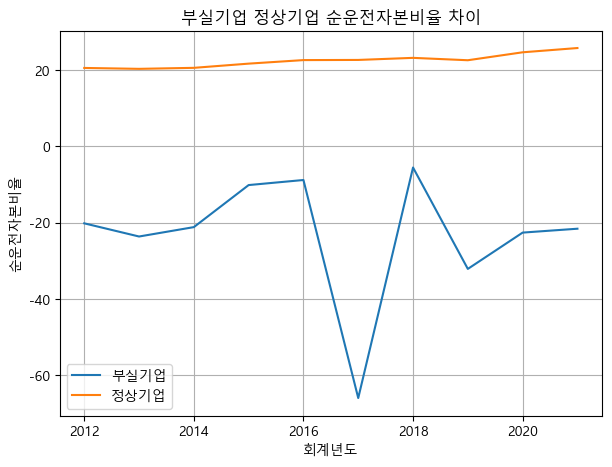

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats
plt.rc('font', family='Malgun Gothic') 
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

부실_df = df[df["target_3"]==1].groupby("회계년도")["순운전자본비율"].mean().reset_index()
정상_df = df[df["target_3"]==0].groupby("회계년도")["순운전자본비율"].mean().reset_index()

plt.figure(figsize=(7,5))
plt.plot(부실_df["회계년도"], 부실_df["순운전자본비율"], label = "부실기업")
plt.plot(정상_df["회계년도"], 정상_df["순운전자본비율"], label = "정상기업")
plt.title("부실기업 정상기업 순운전자본비율 차이")
plt.xlabel("회계년도")
plt.ylabel("순운전자본비율")
plt.legend()
plt.grid(True)
plt.show()